In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_parquet('subamostra_traduzidodic.parquet')
df

,NU_INSCRICAO,NU_ANO,TP_SEXO,TP_FAIXA_ETARIA,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,190001004651,2019,0,18,Solteiro(a),Parda,1,2,0,Pública,...,2.0,1.0,1.0,2.0,1.0,1.0,4.0,1.0,1.0,2.0
1,190001004662,2019,1,17,Solteiro(a),Parda,1,3,0,Não Respondeu,...,1.0,1.0,1.0,2.0,1.0,1.0,3.0,1.0,2.0,2.0
2,190001004736,2019,0,18,Solteiro(a),Parda,2,2,0,Pública,...,1.0,1.0,1.0,2.0,1.0,1.0,4.0,1.0,1.0,1.0
3,190001004926,2019,0,33,Solteiro(a),Preta,1,1,13,Não Respondeu,...,2.0,1.0,1.0,2.0,1.0,1.0,3.0,1.0,1.0,1.0
4,190001005145,2019,1,28,Casado(a)/Mora com companheiro(a),Parda,1,1,12,Não Respondeu,...,1.0,1.0,1.0,2.0,2.0,1.0,3.0,1.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299995,210062061543,2023,0,17,Solteiro(a),Preta,1,2,0,Pública,...,2.0,1.0,2.0,2.0,1.0,1.0,4.0,1.0,2.0,2.0
299996,210062061582,2023,0,17,Solteiro(a),Branca,1,2,0,Pública,...,2.0,1.0,2.0,2.0,1.0,1.0,4.0,1.0,2.0,2.0
299997,210062061596,2023,0,17,Solteiro(a),Parda,1,2,0,Pública,...,1.0,2.0,1.0,2.0,1.0,2.0,3.0,1.0,1.0,2.0
299998,210062061746,2023,1,15,Solteiro(a),Branca,1,3,0,Não Respondeu,...,2.0,1.0,2.0,4.0,2.0,1.0,3.0,1.0,3.0,2.0


In [ ]:
gab = pd.read_parquet(r'tabelas_parquet\gabaritos.parquet')
gab

,COR,ANO,COMPETENCIA,CO_PROVA,TX_GABARITO
0,Azul,2019.0,CN,503,AAECACDEADCBCDDDBCBDADAEABCEBABEEBCBEECEBDADC
1,Amarelo,2019.0,CN,504,BEEAAEBEEBADEADDADAEABCEDDDBCBCBCCACBCDADCCEB
2,Branco,2019.0,CN,505,DADCCEBBCCACBEEBEEBACBCDDDDADBCBBCEAEADEADAAE
3,Rosa,2019.0,CN,506,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC
4,Azul,2019.0,CH,507,BACCCBABBADCBCEEEBCACACEEDBCCADBEADBADBBBACDB
...,...,...,...,...,...
255,None,NaN,None,1294,CEBDEABDEDEBAABEECBABADDBEDCCCDDBEECCDBAADDAC
256,None,NaN,None,1301,CBABDBCEEADDDBBCCBEBEEDDCCDCDEEACCBACEACACCDA
257,None,NaN,None,1302,BBCDCDBACCACCDAEEAEACCBAEDDCCBDBEACCCEDDDBEBE
258,None,NaN,None,1303,BDBEACECBABBCDDDBEBEACCDABACEACEEACCDCDEDDCCC


In [ ]:
gab.columns

Index(['COR', 'ANO', 'COMPETENCIA', 'CO_PROVA', 'TX_GABARITO'], dtype='object')

In [ ]:
# Filtra o DataFrame gab para manter apenas linhas com COR não nulo
gab_validas = gab[gab['COR'].notna()]

# Cria um conjunto com os códigos de prova válidos
codigos_validos = set(gab_validas['CO_PROVA'])

# Filtra df para manter apenas as linhas em que TODAS as colunas de prova estão no conjunto válido
df = df[
    df['CO_PROVA_LC'].isin(codigos_validos) &
    df['CO_PROVA_CH'].isin(codigos_validos) &
    df['CO_PROVA_CN'].isin(codigos_validos) &
    df['CO_PROVA_MT'].isin(codigos_validos)
]


In [ ]:
# Dicionário de cores por matéria
cores_materias = {
    'lc': '#0057b7',   # Azul forte
    'ch': '#d90429',   # Vermelho forte
    'cn': '#228B22',   # Verde vegano
    'mt': '#800080'    # Roxo potente
}

# Lista de matérias e suas respectivas colunas de nota
notas = {
    'lc': 'NU_NOTA_LC',
    'ch': 'NU_NOTA_CH',
    'cn': 'NU_NOTA_CN',
    'mt': 'NU_NOTA_MT'
}

colormap_materias = {
    'lc': 'Blues',
    'ch': 'Reds',
    'cn': 'Greens',
    'mt': 'Purples'
}

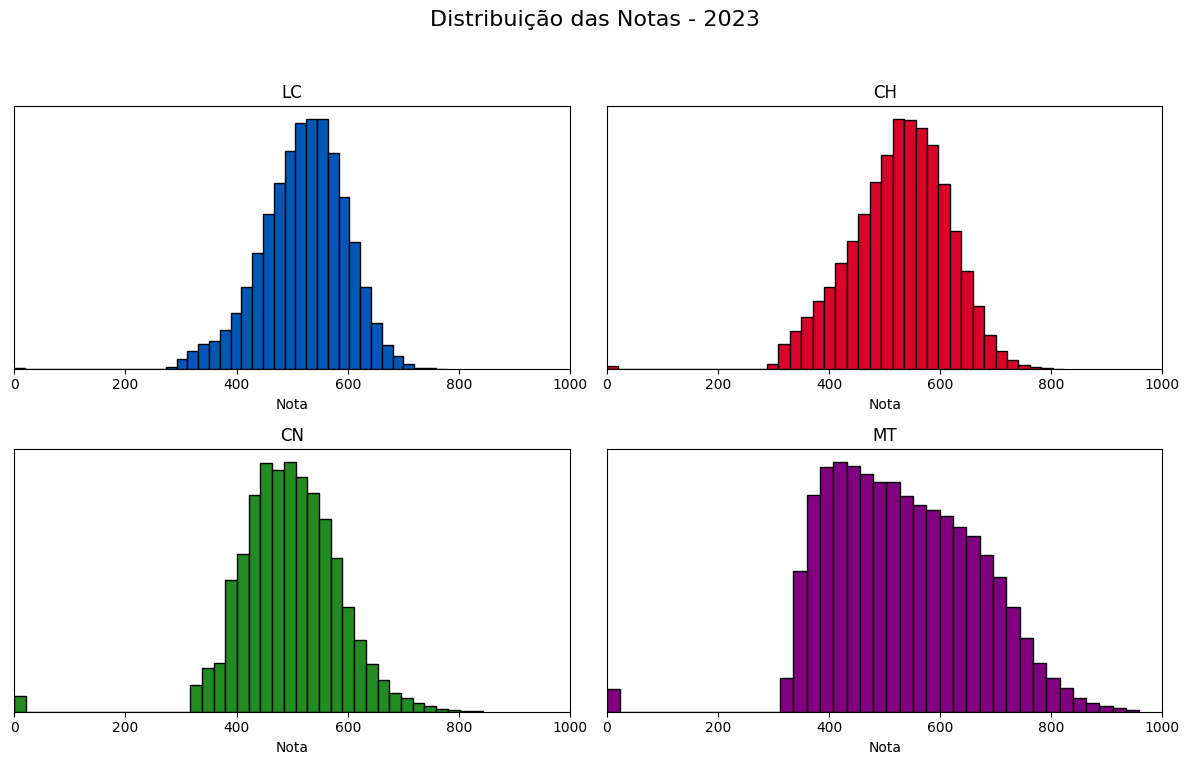

In [ ]:
df_2023 = df[df['NU_ANO'] == 2023]

# Criando os histogramas
plt.figure(figsize=(12, 8))

for i, (sigla, coluna) in enumerate(notas.items()):
    plt.subplot(2, 2, i+1)
    plt.hist(df_2023[coluna].dropna(), bins=40, color=cores_materias[sigla], edgecolor='black')
    plt.title(sigla.upper())  # Apenas a sigla no título
    plt.xlabel('Nota')
    plt.xlim(0, 1000)

    # Remove completamente o eixo Y
    plt.gca().axes.get_yaxis().set_visible(False)
    plt.grid(False)

# Título geral
plt.suptitle('Distribuição das Notas - 2023', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Deixa espaço para o título geral
plt.show()


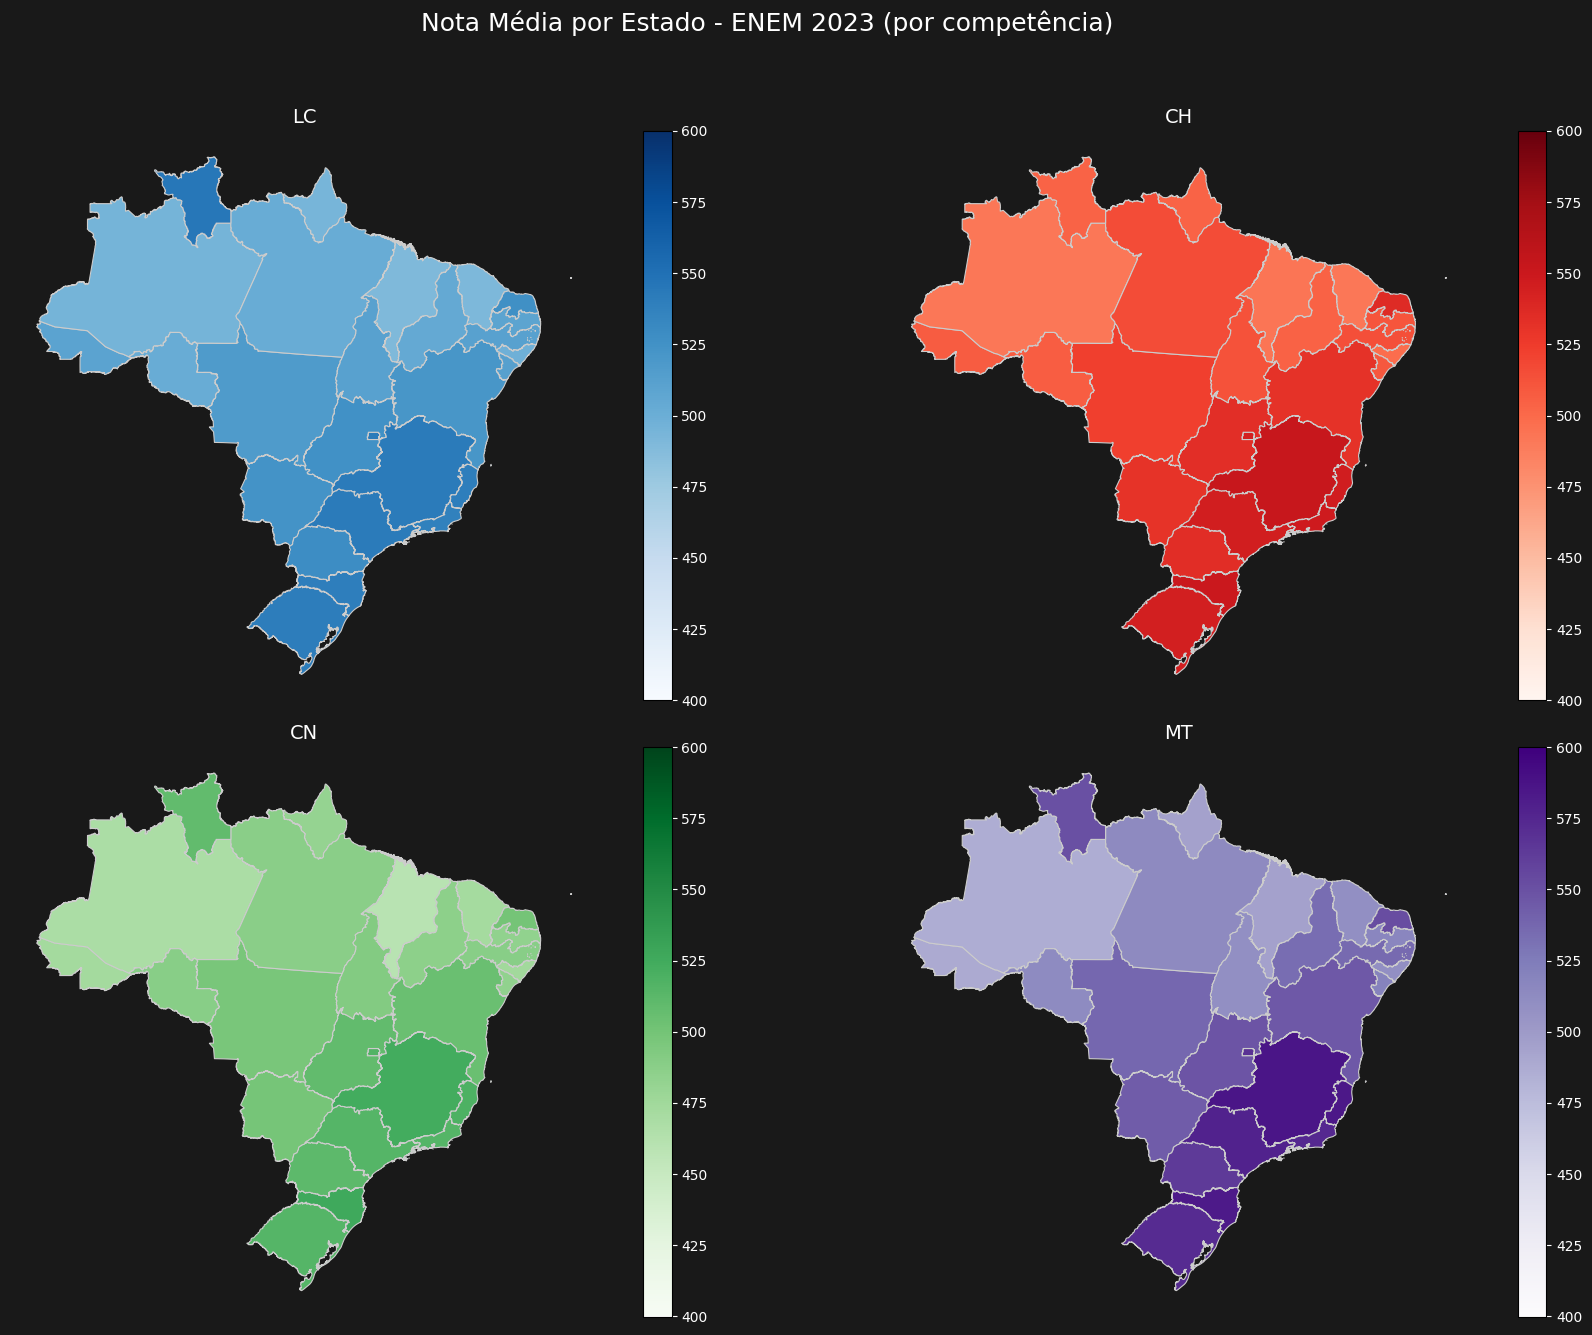

In [ ]:
# %%
# Filtra alunos com todas as notas maiores que 1
df_validos = df_2023[
    (df_2023['NU_NOTA_LC'] > 1) &
    (df_2023['NU_NOTA_CH'] > 1) &
    (df_2023['NU_NOTA_CN'] > 1) &
    (df_2023['NU_NOTA_MT'] > 1)
].copy()

# Calcula a nota média entre as 4 competências
df_validos['NOTA_MEDIA'] = df_validos[['NU_NOTA_LC', 'NU_NOTA_CH', 'NU_NOTA_CN', 'NU_NOTA_MT']].mean(axis=1)

# Agrupa por estado e calcula a média das notas
media_por_estado = df_validos.groupby('SG_UF_ESC')['NOTA_MEDIA'].mean().reset_index()

# %%
import geopandas as gpd
import matplotlib.pyplot as plt

# Lê o arquivo GeoJSON local
estados = gpd.read_file('br_states.json')

# Junta com as notas médias (SIGLA no GeoJSON <-> SG_UF_ESC no df de notas)
estados_notas = estados.merge(media_por_estado, left_on='SIGLA', right_on='SG_UF_ESC')

fig, axs = plt.subplots(2, 2, figsize=(18, 14))
fig.patch.set_facecolor('#191919')  # Fundo do gráfico principal
plt.suptitle('Nota Média por Estado - ENEM 2023 (por competência)', fontsize=18, color='white')

for ax, (sigla, coluna) in zip(axs.flat, notas.items()):
    media = df_validos.groupby('SG_UF_ESC')[coluna].mean().reset_index()
    estados_media = estados.merge(media, left_on='SIGLA', right_on='SG_UF_ESC')

    ax.set_facecolor('#191919')  # Fundo de cada subplot

    plot = estados_media.plot(
        column=coluna,
        cmap=colormap_materias[sigla],
        linewidth=0.8,
        edgecolor='0.8',
        legend=True,
        ax=ax,
        vmin=400,
        vmax=600
    )

    # Deixa os ticks e rótulos da colorbar brancos
    cbar = plot.get_figure().axes[-1]
    cbar.tick_params(colors='white')
    cbar.yaxis.label.set_color('white')

    ax.set_title(f'{sigla.upper()}', fontsize=14, color='white')
    ax.axis('off')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()




In [ ]:
acertos = pd.read_parquet(r'tabelas_parquet\acertos_subamostra.parquet')

colunas_q = [col for col in acertos.columns if col.startswith('Q') and col[1:].isdigit()]

# Soma linha a linha e cria a nova coluna
# Cria listas de colunas para cada competência
colunas_lc = [f'Q{str(i).zfill(3)}' for i in range(1, 51)]
colunas_ch = [f'Q{str(i).zfill(3)}' for i in range(51, 96)]
colunas_cn = [f'Q{str(i).zfill(3)}' for i in range(96, 141)]
colunas_mt = [f'Q{str(i).zfill(3)}' for i in range(141, 186)]

# Soma os acertos por área
acertos['nacertos_LC'] = acertos[colunas_lc].astype(int).sum(axis=1)
acertos['nacertos_CH'] = acertos[colunas_ch].astype(int).sum(axis=1)
acertos['nacertos_CN'] = acertos[colunas_cn].astype(int).sum(axis=1)
acertos['nacertos_MT'] = acertos[colunas_mt].astype(int).sum(axis=1)


In [ ]:
acertos

,NU_INSCRICAO,NU_ANO,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,TP_LINGUA,NU_NOTA_LC,NU_NOTA_CH,NU_NOTA_CN,...,Q180,Q181,Q182,Q183,Q184,Q185,nacertos_LC,nacertos_CH,nacertos_CN,nacertos_MT
0,190001004651,2019,1,1,1,1,1,485.1,417.2,412.5,...,0,0,0,1,0,0,11,11,10,6
1,190001004662,2019,1,1,1,1,1,478.5,492.8,511.9,...,0,0,1,0,1,0,15,13,14,8
2,190001004736,2019,1,1,1,1,0,574.2,570.9,465.0,...,0,0,0,0,0,0,25,21,13,13
3,190001004926,2019,1,1,1,1,1,443.4,487.1,404.6,...,0,0,0,0,0,0,9,15,10,3
4,190001005145,2019,1,1,1,1,0,507.7,485.6,555.6,...,0,0,0,0,1,0,15,12,16,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299995,210062061543,2023,1,1,1,1,0,547.0,464.0,530.2,...,0,1,0,1,0,1,24,13,13,11
299996,210062061582,2023,1,1,1,1,0,541.9,545.1,560.9,...,0,0,0,0,1,0,26,23,14,9
299997,210062061596,2023,1,1,1,1,0,487.6,452.0,337.7,...,0,0,0,0,1,0,15,13,6,8
299998,210062061746,2023,0,0,0,0,0,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Faz o merge trazendo os nacertos para o df
df = df.merge(
    acertos[['NU_INSCRICAO', 'nacertos_LC', 'nacertos_CH', 'nacertos_CN', 'nacertos_MT']],
    on='NU_INSCRICAO',
    how='left'
)
df

,NU_INSCRICAO,NU_ANO,TP_SEXO,TP_FAIXA_ETARIA,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,Q020,Q021,Q022,Q023,Q024,Q025,nacertos_LC,nacertos_CH,nacertos_CN,nacertos_MT
0,190001004651,2019,0,18,Solteiro(a),Parda,1,2,0,Pública,...,1.0,1.0,4.0,1.0,1.0,2.0,11,11,10,6
1,190001004662,2019,1,17,Solteiro(a),Parda,1,3,0,Não Respondeu,...,1.0,1.0,3.0,1.0,2.0,2.0,15,13,14,8
2,190001004736,2019,0,18,Solteiro(a),Parda,2,2,0,Pública,...,1.0,1.0,4.0,1.0,1.0,1.0,25,21,13,13
3,190001004926,2019,0,33,Solteiro(a),Preta,1,1,13,Não Respondeu,...,1.0,1.0,3.0,1.0,1.0,1.0,9,15,10,3
4,190001005145,2019,1,28,Casado(a)/Mora com companheiro(a),Parda,1,1,12,Não Respondeu,...,2.0,1.0,3.0,1.0,2.0,2.0,15,12,16,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187909,210062061309,2023,1,18,Solteiro(a),Parda,1,2,0,Pública,...,1.0,1.0,3.0,1.0,1.0,2.0,16,12,13,17
187910,210062061468,2023,0,15,Solteiro(a),Parda,1,2,0,Pública,...,1.0,2.0,3.0,1.0,1.0,2.0,24,20,14,17
187911,210062061543,2023,0,17,Solteiro(a),Preta,1,2,0,Pública,...,1.0,1.0,4.0,1.0,2.0,2.0,24,13,13,11
187912,210062061582,2023,0,17,Solteiro(a),Branca,1,2,0,Pública,...,1.0,1.0,4.0,1.0,2.0,2.0,26,23,14,9


In [ ]:
df.columns

Index(['NU_INSCRICAO', 'NU_ANO', 'TP_SEXO', 'TP_FAIXA_ETARIA',
       'TP_ESTADO_CIVIL', 'TP_COR_RACA', 'TP_NACIONALIDADE', 'TP_ST_CONCLUSAO',
       'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO', 'IN_TREINEIRO',
       'CO_MUNICIPIO_ESC', 'SG_UF_ESC', 'TP_DEPENDENCIA_ADM_ESC',
       'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC', 'TP_PRESENCA_CN',
       'TP_PRESENCA_CH', 'TP_PRESENCA_LC', 'TP_PRESENCA_MT', 'CO_PROVA_CN',
       'CO_PROVA_CH', 'CO_PROVA_LC', 'CO_PROVA_MT', 'NU_NOTA_CN', 'NU_NOTA_CH',
       'NU_NOTA_LC', 'NU_NOTA_MT', 'TX_RESPOSTAS_CN', 'TX_RESPOSTAS_CH',
       'TX_RESPOSTAS_LC', 'TX_RESPOSTAS_MT', 'TP_LINGUA', 'TP_STATUS_REDACAO',
       'NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3', 'NU_NOTA_COMP4',
       'NU_NOTA_COMP5', 'NU_NOTA_REDACAO', 'Q001', 'Q002', 'Q003', 'Q004',
       'Q005', 'Q006', 'Q007', 'Q008', 'Q009', 'Q010', 'Q011', 'Q012', 'Q013',
       'Q014', 'Q015', 'Q016', 'Q017', 'Q018', 'Q019', 'Q020', 'Q021', 'Q022',
       'Q023', 'Q024', 'Q025', 'nacertos_

In [ ]:
df = df[
    (df['NU_NOTA_LC'] > 1) &
    (df['NU_NOTA_CH'] > 1) &
    (df['NU_NOTA_CN'] > 1) &
    (df['NU_NOTA_MT'] > 1) &
    (df['nacertos_LC'] >= 0) &
    (df['nacertos_CH'] >= 0) &
    (df['nacertos_CN'] >= 0) &
    (df['nacertos_MT'] >= 0) &
    (df['NU_ANO'] == 2023)
].copy()

In [ ]:
# Dicionário de competências
competencias = {
    'LC': ('NU_NOTA_LC', 'nacertos_LC'),
    'CH': ('NU_NOTA_CH', 'nacertos_CH'),
    'CN': ('NU_NOTA_CN', 'nacertos_CN'),
    'MT': ('NU_NOTA_MT', 'nacertos_MT')
}

# Lista para armazenar os resultados
tabela = []

# Itera sobre cada competência
for comp, (col_nota, col_acertos) in competencias.items():
    grupo = df.groupby(col_acertos)[col_nota].agg(['min', 'max']).reset_index()
    grupo.columns = ['ACERTOS', 'NOTA_MIN', 'NOTA_MAX']
    grupo['COMPETENCIA'] = comp
    tabela.append(grupo)

# Concatena todos os resultados em um único DataFrame
tabela_final = pd.concat(tabela, ignore_index=True)

tabela_final = tabela_final[['COMPETENCIA', 'ACERTOS', 'NOTA_MIN', 'NOTA_MAX']]

# Inicializa listas para os novos valores
acertos_min_list = []
acertos_max_list = []

# Para cada linha da tabela_final, calcula ACERTOS_MIN e ACERTOS_MAX
for _, row in tabela_final.iterrows():
    comp = row['COMPETENCIA']
    nota_min = row['NOTA_MIN']
    nota_max = row['NOTA_MAX']

    # Pega os nomes das colunas de nota e acerto correspondentes
    col_nota, col_acertos = competencias[comp]

    # Filtra o df original para valores dentro do intervalo de notas
    df_filtrado = df[(df[col_nota] >= nota_min) & (df[col_nota] <= nota_max)]

    # Dentro desse subconjunto, encontra os acertos mínimo e máximo
    if not df_filtrado.empty:
        acertos_min = df_filtrado[col_acertos].min()
        acertos_max = df_filtrado[col_acertos].max()
    else:
        acertos_min = None
        acertos_max = None

    acertos_min_list.append(acertos_min)
    acertos_max_list.append(acertos_max)

# Adiciona ao DataFrame
tabela_final['ACERTOS_MIN'] = acertos_min_list
tabela_final['ACERTOS_MAX'] = acertos_max_list
tabela_final

,COMPETENCIA,ACERTOS,NOTA_MIN,NOTA_MAX,ACERTOS_MIN,ACERTOS_MAX
0,LC,0,287.2,288.6,0,1
1,LC,1,287.9,291.1,0,7
2,LC,2,289.5,300.7,1,9
3,LC,3,290.0,366.7,1,16
4,LC,4,289.8,379.6,1,16
...,...,...,...,...,...,...
176,MT,41,854.1,920.6,37,43
177,MT,42,888.7,933.2,40,44
178,MT,43,907.7,946.7,41,44
179,MT,44,931.0,958.6,42,45


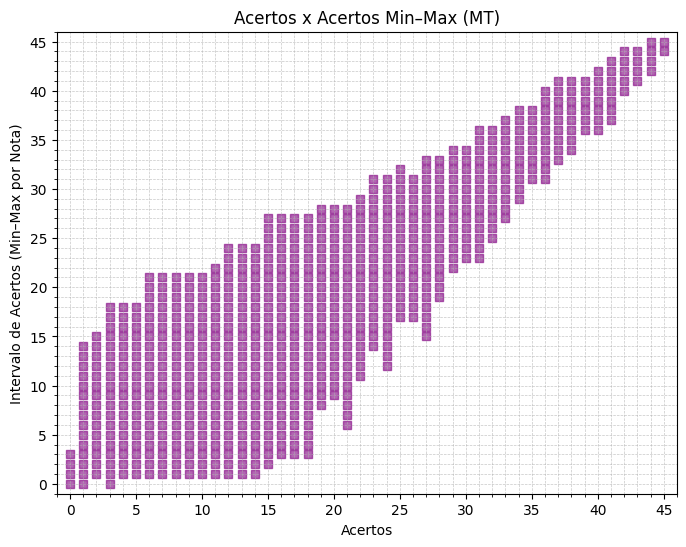

In [ ]:
# Filtra apenas a competência MT
tabela_mt = tabela_final[tabela_final['COMPETENCIA'] == 'MT'].copy()

# Lista para armazenar os pontos do gráfico
x_vals = []
y_vals = []

# Para cada linha, gera todos os pontos entre ACERTOS_MIN e ACERTOS_MAX
for _, row in tabela_mt.iterrows():
    x = row['ACERTOS']
    if pd.notna(row['ACERTOS_MIN']) and pd.notna(row['ACERTOS_MAX']):
        for y in range(int(row['ACERTOS_MIN']), int(row['ACERTOS_MAX']) + 1):
            x_vals.append(x)
            y_vals.append(y)

# Cria o gráfico
plt.figure(figsize=(8, 6))
plt.scatter(x_vals, y_vals, marker='s', s=30, alpha=0.6, color='#800080')

# Ticks principais de 5 em 5
plt.xticks(range(0, 46, 5))
plt.yticks(range(0, 46, 5))

# Limites dos eixos
plt.xlim(-1, 46)
plt.ylim(-1, 46)

# Grid com espaçamento de 1 em 1
plt.grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)
plt.minorticks_on()  # Ativa ticks menores (para o grid)

# Rótulos e título
plt.xlabel('Acertos')
plt.ylabel('Intervalo de Acertos (Min–Max por Nota)')
plt.title('Acertos x Acertos Min–Max (MT)')

plt.show()


In [ ]:
tabela_mt[tabela_mt['ACERTOS'].isin([44, 45])].T

,179,180
COMPETENCIA,MT,MT
ACERTOS,44,45
NOTA_MIN,931.0,958.6
NOTA_MAX,958.6,958.6
ACERTOS_MIN,42,44
ACERTOS_MAX,45,45


In [ ]:
tabela_mt

,COMPETENCIA,ACERTOS,NOTA_MIN,NOTA_MAX,ACERTOS_MIN,ACERTOS_MAX
135,MT,0,328.2,328.2,0,3
136,MT,1,328.2,352.6,0,14
137,MT,2,328.7,369.6,1,15
138,MT,3,328.2,406.9,0,18
139,MT,4,328.6,442.2,1,18
140,MT,5,328.8,451.0,1,18
141,MT,6,328.8,474.2,1,21
142,MT,7,330.1,501.4,1,21
143,MT,8,330.1,514.6,1,21
144,MT,9,330.6,547.1,1,21


In [ ]:
df[df['nacertos_MT'] == 3][['NU_INSCRICAO','NU_NOTA_MT','nacertos_MT']].sort_values('NU_NOTA_MT')

,NU_INSCRICAO,NU_NOTA_MT,nacertos_MT
171223,210060372603,328.2,3
161135,210059379170,328.4,3
168336,210060096580,328.4,3
183828,210061613118,328.4,3
178070,210061047203,328.5,3
...,...,...,...
152396,210058504740,395.5,3
187643,210062033329,399.4,3
161665,210059437134,403.9,3
184340,210061668129,404.3,3


#### POSICAO

In [ ]:
acertos

,NU_INSCRICAO,NU_ANO,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,TP_LINGUA,NU_NOTA_LC,NU_NOTA_CH,NU_NOTA_CN,...,Q180,Q181,Q182,Q183,Q184,Q185,nacertos_LC,nacertos_CH,nacertos_CN,nacertos_MT
0,190001004651,2019,1,1,1,1,1,485.1,417.2,412.5,...,0,0,0,1,0,0,11,11,10,6
1,190001004662,2019,1,1,1,1,1,478.5,492.8,511.9,...,0,0,1,0,1,0,15,13,14,8
2,190001004736,2019,1,1,1,1,0,574.2,570.9,465.0,...,0,0,0,0,0,0,25,21,13,13
3,190001004926,2019,1,1,1,1,1,443.4,487.1,404.6,...,0,0,0,0,0,0,9,15,10,3
4,190001005145,2019,1,1,1,1,0,507.7,485.6,555.6,...,0,0,0,0,1,0,15,12,16,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299995,210062061543,2023,1,1,1,1,0,547.0,464.0,530.2,...,0,1,0,1,0,1,24,13,13,11
299996,210062061582,2023,1,1,1,1,0,541.9,545.1,560.9,...,0,0,0,0,1,0,26,23,14,9
299997,210062061596,2023,1,1,1,1,0,487.6,452.0,337.7,...,0,0,0,0,1,0,15,13,6,8
299998,210062061746,2023,0,0,0,0,0,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
s = acertos[['RESPOSTAS','GABARITOS']].copy()
s['ACERTOS'] = [
    ''.join([
        'Z' if r not in 'ABCDE' or g not in 'ABCDE' else ('A' if r == g else 'E')
        for r, g in zip(resp, gab)
    ])
    for resp, gab in zip(s['RESPOSTAS'], s['GABARITOS'])
]

acertos_array = s['ACERTOS'].apply(lambda x: list(x)).tolist()
acertos_df = pd.DataFrame(acertos_array, columns=[f'Q{str(i+1).zfill(3)}' for i in range(185)])
acertos_df


,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,...,Q176,Q177,Q178,Q179,Q180,Q181,Q182,Q183,Q184,Q185
0,Z,Z,Z,Z,Z,E,E,E,E,E,...,E,E,E,E,E,E,E,A,E,E
1,Z,Z,Z,Z,Z,E,A,E,E,A,...,E,A,E,E,E,E,A,E,A,E
2,A,E,E,E,A,Z,Z,Z,Z,Z,...,E,E,E,E,E,E,E,E,E,E
3,Z,Z,Z,Z,Z,E,A,E,E,A,...,E,E,E,E,E,E,E,E,E,E
4,A,A,A,A,A,Z,Z,Z,Z,Z,...,E,A,E,A,E,E,E,E,A,E
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299995,A,E,E,A,E,Z,Z,Z,Z,Z,...,E,A,E,E,E,A,E,A,E,A
299996,A,A,E,A,E,Z,Z,Z,Z,Z,...,E,E,A,E,E,E,E,E,A,E
299997,A,E,E,E,A,Z,Z,Z,Z,Z,...,E,E,E,A,E,E,E,E,A,E
299998,Z,Z,Z,Z,Z,Z,Z,Z,Z,Z,...,Z,Z,Z,Z,Z,Z,Z,Z,Z,Z


In [ ]:
'''
matriz = acertos_df
lingua = acertos['TP_LINGUA']
nova_parte_fixa = matriz.iloc[:, 10:].copy()

# Gera a parte variável (colunas 0 a 5 ou 5 a 10 dependendo do vetor 'lingua')
parte_variavel = [
    matriz.iloc[i, 0:5].values if lingua[i] == 0 else matriz.iloc[i, 5:10].values
    for i in range(len(matriz))
]

# Converte a parte variável para DataFrame
df_variavel = pd.DataFrame(parte_variavel, index=matriz.index)

# Junta a parte variável com a parte fixa
novo_df = pd.concat([df_variavel, nova_parte_fixa], axis=1)
novo_df

novo_df.columns = list(range(1, 181))
novo_df
'''

" \nmatriz = acertos_df\nlingua = acertos['TP_LINGUA']\nnova_parte_fixa = matriz.iloc[:, 10:].copy()\n\n# Gera a parte variável (colunas 0 a 5 ou 5 a 10 dependendo do vetor 'lingua')\nparte_variavel = [\n    matriz.iloc[i, 0:5].values if lingua[i] == 0 else matriz.iloc[i, 5:10].values\n    for i in range(len(matriz))\n]\n\n# Converte a parte variável para DataFrame\ndf_variavel = pd.DataFrame(parte_variavel, index=matriz.index)\n\n# Junta a parte variável com a parte fixa\nnovo_df = pd.concat([df_variavel, nova_parte_fixa], axis=1)\nnovo_df\n\nnovo_df.columns = list(range(1, 181))\nnovo_df\n"

In [ ]:
acertos_df.columns = list(range(1, 186))
acertos_df['NU_ANO'] = acertos['NU_ANO']
acertos_df['NU_INSCRICAO'] = acertos['NU_INSCRICAO']
acertos_df

,1,2,3,4,5,6,7,8,9,10,...,178,179,180,181,182,183,184,185,NU_ANO,NU_INSCRICAO
0,Z,Z,Z,Z,Z,E,E,E,E,E,...,E,E,E,E,E,A,E,E,2019,190001004651
1,Z,Z,Z,Z,Z,E,A,E,E,A,...,E,E,E,E,A,E,A,E,2019,190001004662
2,A,E,E,E,A,Z,Z,Z,Z,Z,...,E,E,E,E,E,E,E,E,2019,190001004736
3,Z,Z,Z,Z,Z,E,A,E,E,A,...,E,E,E,E,E,E,E,E,2019,190001004926
4,A,A,A,A,A,Z,Z,Z,Z,Z,...,E,A,E,E,E,E,A,E,2019,190001005145
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299995,A,E,E,A,E,Z,Z,Z,Z,Z,...,E,E,E,A,E,A,E,A,2023,210062061543
299996,A,A,E,A,E,Z,Z,Z,Z,Z,...,A,E,E,E,E,E,A,E,2023,210062061582
299997,A,E,E,E,A,Z,Z,Z,Z,Z,...,E,A,E,E,E,E,A,E,2023,210062061596
299998,Z,Z,Z,Z,Z,Z,Z,Z,Z,Z,...,Z,Z,Z,Z,Z,Z,Z,Z,2023,210062061746


In [ ]:
# Despivotando
acertos_long = acertos_df.melt(
    id_vars=['NU_ANO', 'NU_INSCRICAO'],
    var_name='QUESTAO',
    value_name='VALOR'
)

# Converte a coluna 'QUESTAO' para inteiro (caso ainda esteja como string)
acertos_long['QUESTAO'] = acertos_long['QUESTAO'].astype(int)

# Cria a coluna QUESTAO_ID
acertos_long['ID_QUESTAO'] = acertos_long['NU_ANO'] * 1000 + acertos_long['QUESTAO']

# Reorganiza as colunas
acertos_long = acertos_long[['ID_QUESTAO', 'NU_INSCRICAO', 'VALOR']]
acertos_long

,ID_QUESTAO,NU_INSCRICAO,VALOR
0,2019001,190001004651,Z
1,2019001,190001004662,Z
2,2019001,190001004736,A
3,2019001,190001004926,Z
4,2019001,190001005145,A
...,...,...,...
55499995,2023185,210062061543,A
55499996,2023185,210062061582,E
55499997,2023185,210062061596,E
55499998,2023185,210062061746,Z


In [ ]:
corresp = pd.read_parquet(r'tabelas_parquet\correspondencias.parquet')
corresp

,ID_QUESTAO,RESPOSTA,Amarelo,Azul,Branco,Rosa,COMPETENCIA,ANO
0,2019001,B,2,1,3,4,Inglês,2019
1,2019002,D,4,2,5,2,Inglês,2019
2,2019003,A,5,3,4,1,Inglês,2019
3,2019004,B,1,4,2,3,Inglês,2019
4,2019005,E,3,5,1,5,Inglês,2019
...,...,...,...,...,...,...,...,...
920,2023181,E,152,176,145,163,MT,2023
921,2023182,A,153,177,146,164,MT,2023
922,2023183,B,167,178,163,147,MT,2023
923,2023184,C,168,179,164,148,MT,2023


In [ ]:
df_a = acertos_long.merge(corresp, left_on='ID_QUESTAO',right_on='ID_QUESTAO')

In [ ]:
df_a.columns

Index(['ID_QUESTAO', 'NU_INSCRICAO', 'VALOR', 'RESPOSTA', 'Amarelo', 'Azul',
       'Branco', 'Rosa', 'COMPETENCIA', 'ANO'],
      dtype='object')

In [ ]:
df_a = df_a[df_a['VALOR'] != 'Z']
df_a

,ID_QUESTAO,NU_INSCRICAO,VALOR,RESPOSTA,Amarelo,Azul,Branco,Rosa,COMPETENCIA,ANO
2,2019001,190001004736,A,B,2,1,3,4,Inglês,2019
4,2019001,190001005145,A,B,2,1,3,4,Inglês,2019
7,2019001,190001005284,E,B,2,1,3,4,Inglês,2019
8,2019001,190001005310,A,B,2,1,3,4,Inglês,2019
14,2019001,190001006062,E,B,2,1,3,4,Inglês,2019
...,...,...,...,...,...,...,...,...,...,...
55499993,2023185,210062061309,A,C,169,180,165,149,MT,2023
55499994,2023185,210062061468,A,C,169,180,165,149,MT,2023
55499995,2023185,210062061543,A,C,169,180,165,149,MT,2023
55499996,2023185,210062061582,E,C,169,180,165,149,MT,2023


In [ ]:
df_a['VALOR']= df_a['VALOR'].replace({'A': 1, 'E': 0}).astype(int)
df_a

C:\Users\Usuário\AppData\Local\Temp\ipykernel_15212\2155533423.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_a['VALOR']= df_a['VALOR'].replace({'A': 1, 'E': 0}).astype(int)


,ID_QUESTAO,NU_INSCRICAO,VALOR,RESPOSTA,Amarelo,Azul,Branco,Rosa,COMPETENCIA,ANO
2,2019001,190001004736,1,B,2,1,3,4,Inglês,2019
4,2019001,190001005145,1,B,2,1,3,4,Inglês,2019
7,2019001,190001005284,0,B,2,1,3,4,Inglês,2019
8,2019001,190001005310,1,B,2,1,3,4,Inglês,2019
14,2019001,190001006062,0,B,2,1,3,4,Inglês,2019
...,...,...,...,...,...,...,...,...,...,...
55499993,2023185,210062061309,1,C,169,180,165,149,MT,2023
55499994,2023185,210062061468,1,C,169,180,165,149,MT,2023
55499995,2023185,210062061543,1,C,169,180,165,149,MT,2023
55499996,2023185,210062061582,0,C,169,180,165,149,MT,2023


In [ ]:
df_a

,ID_QUESTAO,NU_INSCRICAO,VALOR,RESPOSTA,Amarelo,Azul,Branco,Rosa,COMPETENCIA,ANO
2,2019001,190001004736,1,B,2,1,3,4,Inglês,2019
4,2019001,190001005145,1,B,2,1,3,4,Inglês,2019
7,2019001,190001005284,0,B,2,1,3,4,Inglês,2019
8,2019001,190001005310,1,B,2,1,3,4,Inglês,2019
14,2019001,190001006062,0,B,2,1,3,4,Inglês,2019
...,...,...,...,...,...,...,...,...,...,...
55499993,2023185,210062061309,1,C,169,180,165,149,MT,2023
55499994,2023185,210062061468,1,C,169,180,165,149,MT,2023
55499995,2023185,210062061543,1,C,169,180,165,149,MT,2023
55499996,2023185,210062061582,0,C,169,180,165,149,MT,2023


In [ ]:
df_a = df_a.groupby(['ID_QUESTAO', 'Amarelo', 'Azul', 'Branco', 'Rosa']).agg(
    ACERTOS=('VALOR', 'sum'),
    TOTAL=('VALOR', 'count')
).reset_index()
df_a

,ID_QUESTAO,Amarelo,Azul,Branco,Rosa,ACERTOS,TOTAL
0,2019001,2,1,3,4,14153,22782
1,2019002,4,2,5,2,12047,22772
2,2019003,5,3,4,1,15530,22757
3,2019004,1,4,2,3,16773,22782
4,2019005,3,5,1,5,12122,22760
...,...,...,...,...,...,...,...
916,2023181,152,176,145,163,15500,40369
917,2023182,153,177,146,164,14995,40354
918,2023183,167,178,163,147,10120,40354
919,2023184,168,179,164,148,23099,40375


In [ ]:
#esta errado